# Clustering Analysis ✨

##### Clustering analysis an unsupervised learning process often done for exploratory data analysis and pre-processing techniques.
##### Unsupervised learning is a learning process that the computer does without the manipulation or intervention of a person.
##### Case in closing, Clustering analyis is a good way to identify relationships and better understand your data. We will be applying
##### different clustering techniques and measuring them for overall performance.

### Algorithms used for exploratory analysis:
 - KMeans
 - Density-based Spatial Clustering of Applications with Noise (DBSCAN)
 - Spectral clustering

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm as cm
import seaborn as sns
from sklearn import cluster
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:\\Users\\mgior\\Downloads\\p3_2moons.csv', header = 0)
df = pd.DataFrame()

df = pd.concat([data, df])
df

,x,y,class
0,-0.036420,0.425192,1
1,1.004359,-0.439032,1
2,0.885975,-0.315673,1
3,0.333107,-0.422853,1
4,-0.837682,0.532822,0
...,...,...,...
995,0.804351,0.550142,0
996,-0.153885,0.932474,0
997,1.673422,-0.328071,1
998,-0.955380,0.295783,0


##### Checking for missing values

In [3]:
df.isnull().any()

x        False
y        False
class    False
dtype: bool

In [4]:
# Awesome.

##### Checking for objects/ differing data types

In [5]:
df.isna().any()

x        False
y        False
class    False
dtype: bool

###### Great. Now, let us begin exploring the data.
 - df.describe() will give us descriptive statistical information about our data.

In [6]:
df.describe()

,x,y,class
count,1000.000000,1000.000000,1000.00000
mean,0.498880,0.247990,0.50000
std,0.869879,0.499136,0.50025
min,-1.162960,-0.681861,0.00000
25%,-0.048614,-0.224234,0.00000
50%,0.532467,0.232782,0.50000
75%,1.047237,0.704901,1.00000
max,2.196801,1.146163,1.00000


In [7]:
df.count()

x        1000
y        1000
class    1000
dtype: int64

### Train / Test Split Preparation ✔
- Establish X and Y
- Create train / test split variable

In [8]:
Y = df['class']
X = df.drop(['class'] , axis = 1)
Z = hierarchy.linkage(X, 'single')
W = hierarchy.linkage(X, 'complete')
X

,x,y
0,-0.036420,0.425192
1,1.004359,-0.439032
2,0.885975,-0.315673
3,0.333107,-0.422853
4,-0.837682,0.532822
...,...,...
995,0.804351,0.550142
996,-0.153885,0.932474
997,1.673422,-0.328071
998,-0.955380,0.295783


In [9]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
# Before, we get into our clustering techniques. Let us prime our data by categorizing them into different points using
# using the K-Nearest Neighbors classifier.

### K-Nearest neighbor classifier

In this approach, the class label of a test instance is predicted based on the majority class of its *k* closest training instances. The number of nearest neighbors, *k*, is a hyperparameter that must be provided by the user, along with the distance metric. By default, we can use Euclidean distance:

\begin{equation*}
\textrm{Euclidean distance}(x,y) = \sqrt{\sum_{k=1}^n (x_k-y_k)^2}
\end{equation*}

Text(0, 0.5, 'Accuracy')

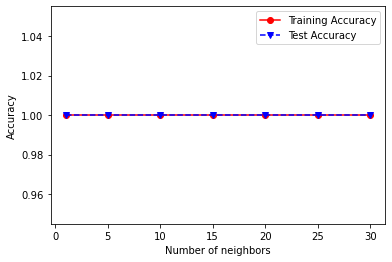

In [11]:
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean', p = 1)
    clf.fit(X_tr, Y_tr)
    Y_predTrain = clf.predict(X_tr)
    Y_predTest = clf.predict(X_te)
    trainAcc.append(accuracy_score(Y_tr, Y_predTrain))
    testAcc.append(accuracy_score(Y_te, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [12]:
## OK. Unfortunately, we were not able to discern how many neighbors were best for optimized correlation.

In [13]:
## Let's move forward with clustering analysis. We'll start with K-Means.

###  K-Means: 📝
1. Most popular unsupervised machine learning algorithm. 
2. K-Means clustering is used to find intrinsic groups w ithin the unlabelled dataset and draw inferences from them. 
3. Groups will be defined by euclidean distance, as stated above.


### Step by Step 🦵 (as defined for each technique): 
1. Import Algorithm
2. Set parameters and fit model
3. Define metric, in this instance we know it is by euclidean distance.

In [14]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=34)
k_means.fit(X)

KMeans(max_iter=50, n_clusters=2, random_state=34)

In [15]:
centroids = k_means.cluster_centers_
labels = k_means.labels_
pd.DataFrame(centroids, columns=X.columns)

,x,y
0,-0.220515,0.575864
1,1.184553,-0.064515


Text(0, 0.5, 'SSE')

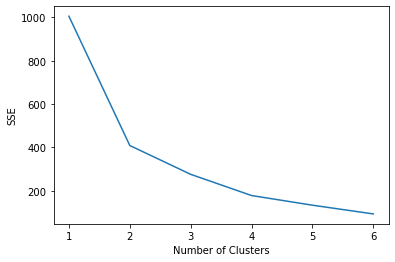

In [16]:
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

#### This visualization is better known as the "elbow" method and tells us the most optimized number of clusters to use for our
#### K-Means approach by measuring the 'sum of standard error' or SSE. SSE is calculated as follows:

\begin{equation*}
\textrm{Sum of Squared Errors} (\bar{x},\bar{y}) = \sum_{k=1}^{n} (y_k - \bar{y})
\end{equation*}

#### A 'sum of squared errors' outcome calculates the sum of the distance or residual relationship of our objects in the given dataset, to our algorithm or model.

### Hierarchical clustering is a process that defines clusters by their distances. Here are their types:
1. Single-link: captures the distance between the closest elements in clusters

\begin{equation*}
\textrm{Single-link: }D(c_1,c_2) = min(x_1,x_2)
\end{equation*}

2. Complete-link: captures the distance between the furthest elements in clusters

\begin{equation*}
\textrm{Complete-link: }D(c_1,c_2) = max(x_1,x_2)
\end{equation*}

3. Average-link: uses the distance between mean instance points in and amongst clusters

\begin{equation*}
\textrm{Average-link: }D(c_1,c_2) = {\frac{1}{|c_1|}\frac{1}{|c_2|}\sum_{x_1 \in c_1}\sum_{x_2 \in c_2} D(x_1,x_2)}
\end{equation*}

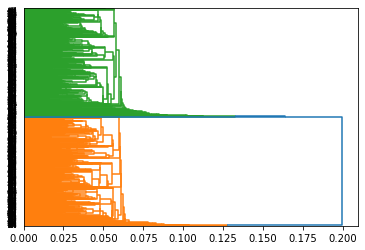

In [17]:
%matplotlib inline

singlelink_dn = hierarchy.dendrogram(Z,orientation='right')

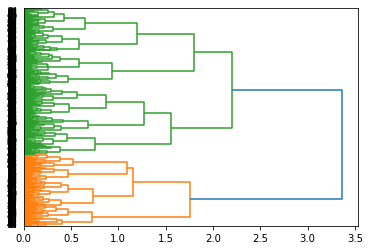

In [18]:
%matplotlib inline

completelink_dn = hierarchy.dendrogram(W,orientation='right')

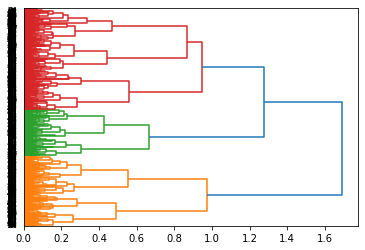

In [19]:
%matplotlib inline

V = hierarchy.linkage(X, 'average')
average_dn = hierarchy.dendrogram(V, orientation = 'right')

In [20]:
df['class'].count()

1000

## DBSCAN 🤖 or (Density-based Spatial Clustering of Applications w/ Noise) 
- Things to know:
    1. Outliers are the determining/reference point for clusters
	2. Set parameters for how many minimum pts in a cluster and set epsilon, which is number of outliers
	
    👍:
        - Desire is to eliminate noise/outliers to draw inclinations.
        - Separating high differentiating density of clusters: High/low
   
       👎:
        - Separating varying densities: high/medium, medium/low, high/medium/low
        - High dimensionality… This is because as dimensions increase it becomes hard to group the clusters together


<AxesSubplot:xlabel='x', ylabel='y'>

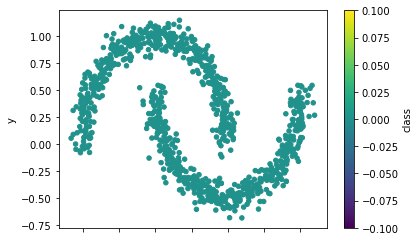

In [21]:
db = DBSCAN(eps=15.5, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['class'])
result = pd.concat((X,labels), axis=1)
result.plot.scatter(x='x',y='y',c='class', colormap='viridis')

## Spectral Clustering 🌌
- Spectral clustering takes an unbiased approach to understanding the shapes of clusters that does not require iterative process to develop viable inferences.
- This makes it good as an initial benchmark model for clustering analysis.

<AxesSubplot:xlabel='x', ylabel='y'>

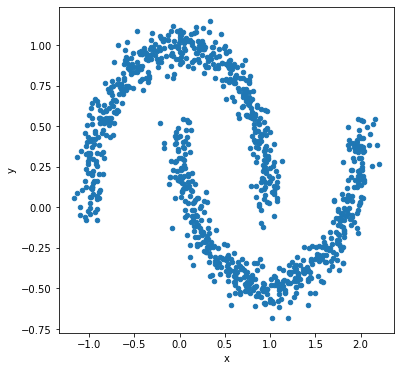

In [22]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
X.plot.scatter(x='x',y='y',ax=ax1)

### Thank you for following along! 👏👏I hope you were able to gain some insight on the different clustering techniques used in exploratory data analysis and "unsupervised" learning.